<a href="https://colab.research.google.com/github/shafaalifia/Pemrograman_Python/blob/main/Tugas%20Minggu%2011_Shafa%20Alifia%20Rachman_1101184214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

 3scene/      coast_test.jpg                    nnmodel_scene/
 5scene/     'Image_Classification (1).ipynb'   Untitled
 coast1.jpg   Image_Classification.ipynb        Untitled1.ipynb


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("5scene")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [16]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(5, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(35, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(55, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(150, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 5)         140       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 5)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 35)        1610      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 35)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 55)        17380     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 55)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1980)             

In [17]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [18]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

Epoch 1/30
14/14 [==============================] - 2s 110ms/step - loss: 1.5968 - accuracy: 0.2717 - val_loss: 1.5483 - val_accuracy: 0.3082
Epoch 2/30
14/14 [==============================] - 1s 100ms/step - loss: 1.4499 - accuracy: 0.4178 - val_loss: 1.3874 - val_accuracy: 0.4384
Epoch 3/30
14/14 [==============================] - 1s 100ms/step - loss: 1.2926 - accuracy: 0.4521 - val_loss: 1.2549 - val_accuracy: 0.4863
Epoch 4/30
14/14 [==============================] - 1s 102ms/step - loss: 1.1543 - accuracy: 0.5502 - val_loss: 1.2446 - val_accuracy: 0.4795
Epoch 5/30
14/14 [==============================] - 1s 101ms/step - loss: 1.0474 - accuracy: 0.5639 - val_loss: 1.1445 - val_accuracy: 0.5616
Epoch 6/30
14/14 [==============================] - 1s 101ms/step - loss: 0.9272 - accuracy: 0.6347 - val_loss: 1.0376 - val_accuracy: 0.5890
Epoch 7/30
14/14 [==============================] - 1s 101ms/step - loss: 0.8294 - accuracy: 0.6804 - val_loss: 0.9172 - val_accuracy: 0.5890
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


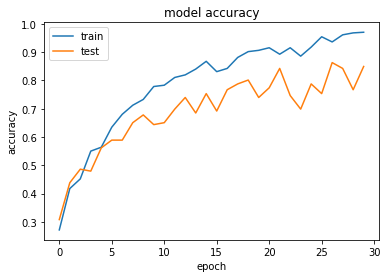

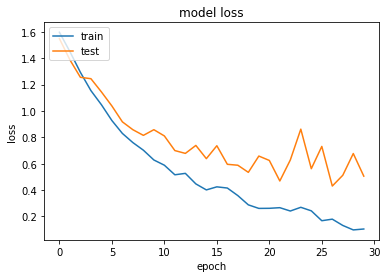

In [19]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.80      0.96      0.87        25
      GMB_02       0.90      0.84      0.87        31
      GMB_03       0.97      0.91      0.94        32
      GMB_04       0.84      0.68      0.75        31
      GMB_05       0.75      0.89      0.81        27

    accuracy                           0.85       146
   macro avg       0.85      0.85      0.85       146
weighted avg       0.86      0.85      0.85       146

